<a href="https://colab.research.google.com/github/chandrajitpal/Cybersecurity/blob/main/cyberlabs/LAB5_cyber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
K-Nearest Neighbor Classifier Accuracy: 0.3730392156862745
Support Vector Linear Classifier Accuracy: 0.7629901960784313


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/tmp/ipython-input-2748862474.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels([''] + labels)
/tmp/ipython-input-2748862474.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_yticklabels([''] + labels)


Multi Layer Perceptron Classifier Accuracy: 0.921813725490196


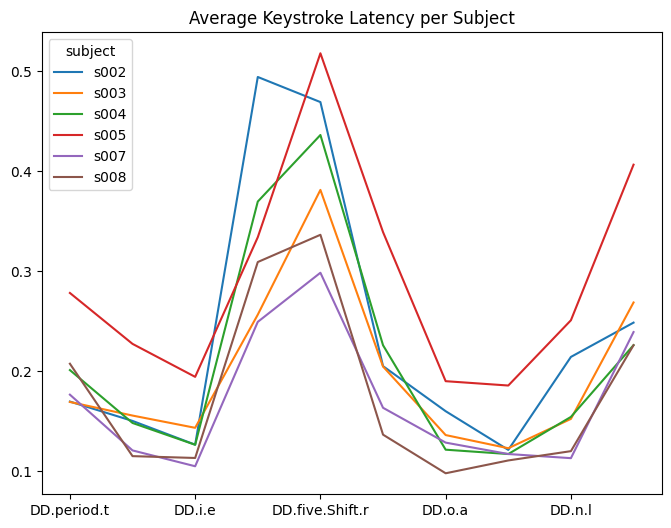

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier


from google.colab import drive
drive.mount('/content/drive')


# Load the data.
pwd_data = pd.read_csv('/content/drive/My Drive/PICTURES_CYBER/DSL-StrongPasswordData.csv', header = 0)



# Average Keystroke Latency per Subject

DD = [dd for dd in pwd_data.columns if dd.startswith('DD')]
plot = pwd_data[DD].copy() # Use .copy() to avoid SettingWithCopyWarning
plot['subject'] = pwd_data['subject'].values
plot = plot.groupby('subject').mean()

plot.iloc[:6].T.plot(figsize=(8, 6), title='Average Keystroke Latency per Subject')


data_train, data_test = train_test_split(pwd_data, test_size = 0.2, random_state=0)

X_train = data_train[pwd_data.columns[2:]]
y_train = data_train['subject']

X_test = data_test[pwd_data.columns[2:]]
y_test = data_test['subject']

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

y_pred_knc = knc.predict(X_test)

knc_accuracy = metrics.accuracy_score(y_test, y_pred_knc)
print('K-Nearest Neighbor Classifier Accuracy:', knc_accuracy)

svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

svc_accuracy = metrics.accuracy_score(y_test, y_pred_svc)
print('Support Vector Linear Classifier Accuracy:', svc_accuracy)




mlpc = MLPClassifier(max_iter=500) # Increased max_iter
mlpc.fit(X_train,y_train)

y_pred_mlpc = mlpc.predict(X_test)

mlpc_accuracy = metrics.accuracy_score(y_test, y_pred_mlpc)
print('Multi Layer Perceptron Classifier Accuracy:', mlpc_accuracy)




from sklearn.metrics import confusion_matrix

labels = list(pwd_data['subject'].unique())
cm = confusion_matrix(y_test, y_pred_mlpc, labels=labels) # Pass labels as keyword argument and use y_pred_mlpc

figure = plt.figure()
axes = figure.add_subplot(111)
cax = axes.matshow(cm) # Changed 'figure.colorbar(axes.matshow(cm))' to 'cax = axes.matshow(cm)' to avoid error
figure.colorbar(cax) # Pass the returned AxesImage object to colorbar
axes.set_xticklabels([''] + labels)
axes.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show() # Added plt.show() to display the plot

**Eigenvectors & Eigenvalues**

In [2]:


import numpy as np

X = np.array([
 [3, 0.1, -2.4],
 [3.1, 0.3, -2.6],
 [3.4, 0.2, -1.9],
])

print(np.cov(X).T)



[[7.30333333 7.69166667 7.19166667]
 [7.69166667 8.12333333 7.54333333]
 [7.19166667 7.54333333 7.12333333]]


In [4]:


"""
     __        __
    |            |
    | 2       -4 |
A = |            |
    | 4       -6 |
    |__        __|


"""


import numpy as np
eigenvaules, eigenvectors = np.linalg.eig(np.array([[2, -4], [4, -6]]))

print("Eigenvaules:", eigenvaules)
print("Eigenvectors:", eigenvectors)



Eigenvaules: [-1.99999996 -2.00000004]
Eigenvectors: [[0.70710678 0.70710678]
 [0.70710678 0.70710678]]


**Biometric authentication with facial recognition**

In [3]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


lfw = fetch_lfw_people(min_faces_per_person=150)

X_data = lfw.data
y_target = lfw.target
names = lfw.target_names

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3)


pca = PCA(n_components=150, whiten=True)
pca.fit(X_train)

pca_train = pca.transform(X_train)
pca_test = pca.transform(X_test)


mlpc = MLPClassifier()
mlpc.fit(pca_train, y_train)

y_pred = mlpc.predict(pca_test)
print(classification_report(y_test, y_pred, target_names=names))

               precision    recall  f1-score   support

 Colin Powell       0.98      0.84      0.91        77
George W Bush       0.93      0.99      0.96       153

     accuracy                           0.94       230
    macro avg       0.96      0.92      0.93       230
 weighted avg       0.95      0.94      0.94       230

